In [18]:
import numpy as np;import pandas as pd;import matplotlib.pyplot as plt;import seaborn as sns;sns.set()
housing=pd.read_csv(r'C:\Users\SONY\Desktop\NumPy\housing.data.txt',names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS',
                                                                       'RAD','TAX','PTRAIO','B','LSTAT','MEDV'],sep='\s+')
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRAIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [21]:
from sklearn.linear_model import RANSACRegressor;from sklearn.linear_model import LinearRegression
X=housing[['RM']].values
y=housing[['MEDV']].values
rc=RANSACRegressor(base_estimator=LinearRegression(),max_trials=100,min_samples=50,residual_threshold=5,random_state=0)
rc.fit(X,y)



RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False),
                is_data_valid=None, is_model_valid=None, loss='absolute_loss',
                max_skips=inf, max_trials=100, min_samples=50, random_state=0,
                residual_threshold=5, stop_n_inliers=inf, stop_probability=0.99,
                stop_score=inf)

Text(0, 0.5, 'Precio vivienda en miles de dolares')

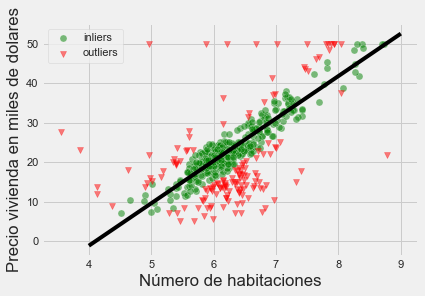

In [22]:
outliers=np.logical_not(rc.inlier_mask_)
inliers=rc.inlier_mask_
numero_habitaciones=np.arange(4,10)[:,np.newaxis]
plt.style.use('fivethirtyeight')
precio=rc.predict(numero_habitaciones)
plt.scatter(X[inliers],y[inliers],c='green',marker='o',alpha=0.5,edgecolors='white',s=50,label='inliers')
plt.scatter(X[outliers],y[outliers],c='red',marker='v',alpha=0.5,label='outliers')

plt.plot(numero_habitaciones,precio,c='black')
plt.legend()
plt.xlabel('Número de habitaciones');plt.ylabel('Precio vivienda en miles de dolares')

